In [125]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix

In [59]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Converter em DataFrame
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# Adicionar a coluna de targets
df['Target'] = iris.target

# Visualizar as primeiras linhas
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [60]:
# salvando para analisar no olho como ele funciona.
df.to_csv('iris_dataset.csv', index=False)

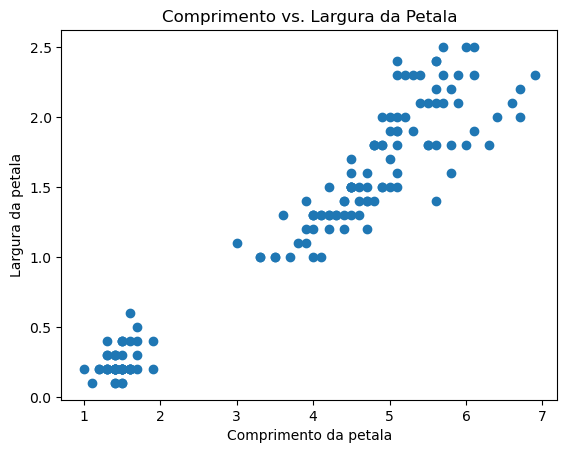

In [61]:
plt.scatter(iris.data[:, 2], iris.data[:, 3]) # 2 é a coluna de comprimento e 3 é a coluna de largura da petala
plt.xlabel('Comprimento da petala')
plt.ylabel('Largura da petala')
plt.title('Comprimento vs. Largura da Petala')
plt.show()

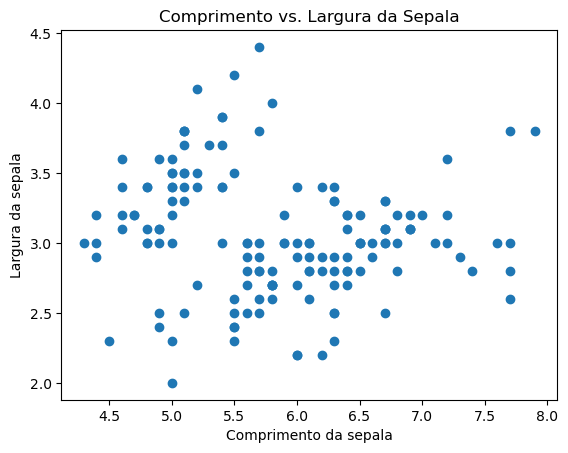

In [62]:
plt.scatter(iris.data[:, 0], iris.data[:, 1]) # 2 é a coluna de comprimento e 3 é a coluna de largura da petala
plt.xlabel('Comprimento da sepala')
plt.ylabel('Largura da sepala')
plt.title('Comprimento vs. Largura da Sepala')
plt.show()

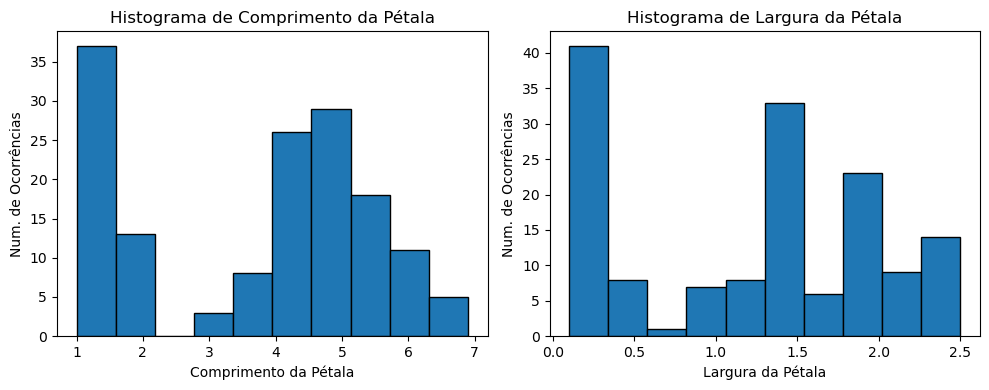

In [63]:
# Criando uma figura com dois subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotando o histograma do comprimento da pétala
axs[0].hist(iris.data[:, 2], bins=10, edgecolor='black')
axs[0].set_xlabel('Comprimento da Pétala')
axs[0].set_ylabel('Num. de Ocorrências')
axs[0].set_title('Histograma de Comprimento da Pétala')

# Plotando o histograma da largura da pétala
axs[1].hist(iris.data[:, 3], bins=10, edgecolor='black')
axs[1].set_xlabel('Largura da Pétala')
axs[1].set_ylabel('Num. de Ocorrências')
axs[1].set_title('Histograma de Largura da Pétala')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

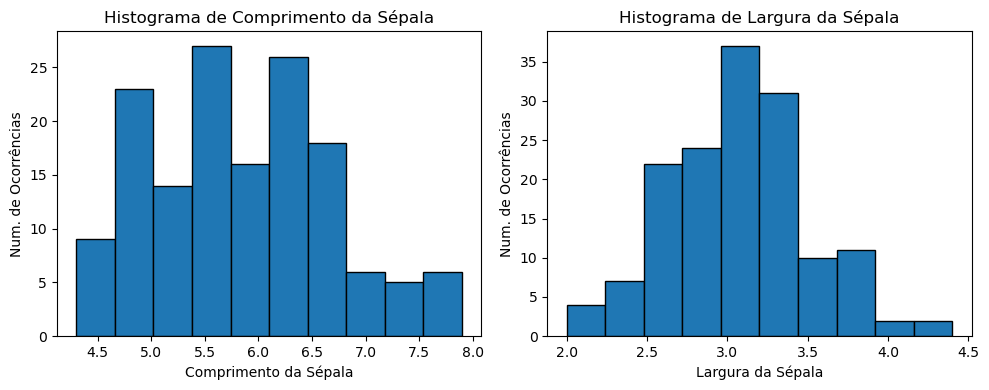

In [64]:
# Criando uma figura com dois subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotando o histograma do comprimento da pétala
axs[0].hist(iris.data[:, 0], bins=10, edgecolor='black')
axs[0].set_xlabel('Comprimento da Sépala')
axs[0].set_ylabel('Num. de Ocorrências')
axs[0].set_title('Histograma de Comprimento da Sépala')

# Plotando o histograma da largura da pétala
axs[1].hist(iris.data[:, 1], bins=10, edgecolor='black')
axs[1].set_xlabel('Largura da Sépala')
axs[1].set_ylabel('Num. de Ocorrências')
axs[1].set_title('Histograma de Largura da Sépala')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [111]:
# Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [112]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


Com a tabela de correlação podemos ver que as variáveis petal lenght e petal width tem mais correlação com nosso target que as outras, com uma correlação de ~0.95 e sepal lenght também é bastante correlacionado, com 0.78 de correlação, já sepal width é bem pouco correlacionado então estou pensando em tirar do nosso aprendizado.

In [129]:
# setando os valores que o professor pediu para teste inicial

k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'adam' 
activation = 'identity'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib

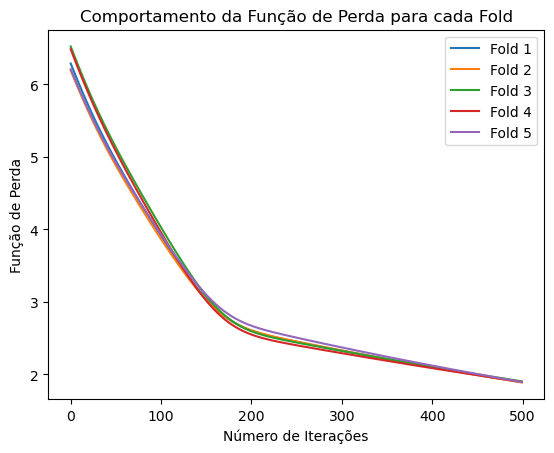

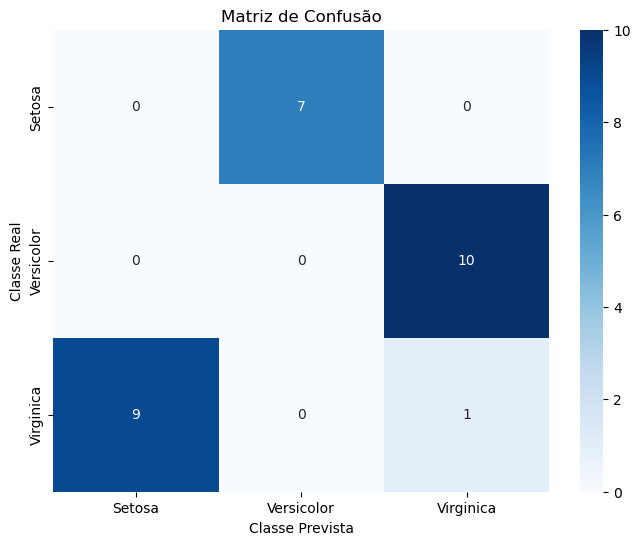

Fold 1:
Score de Treinamento: 0.05555555555555555
Score de Teste: 0.07407407407407407

Fold 2:
Score de Treinamento: 0.037037037037037035
Score de Teste: 0.0

Fold 3:
Score de Treinamento: 0.19444444444444445
Score de Teste: 0.1111111111111111

Fold 4:
Score de Treinamento: 0.12037037037037036
Score de Teste: 0.14814814814814814

Fold 5:
Score de Treinamento: 0.037037037037037035
Score de Teste: 0.037037037037037035



In [130]:
def tarefa3(max_iterations, hidden_layer_sizes, solver, activation):
    train_scores = []
    test_scores = []
    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                            max_iter=max_iterations,
                            activation=activation,
                            solver=solver,
                            random_state=42)
        
        # Treinando o modelo
        model.fit(X_fold_train, y_fold_train)
        
        # Calculando o score ( acurácia ) de treinamento
        train_score = model.score(X_fold_train, y_fold_train)
        train_scores.append(train_score)
        
        # Calculando o score ( acurácia ) de teste
        test_score = model.score(X_fold_val, y_fold_val)
        test_scores.append(test_score)
        
        # Obtendo as funções de perda durante o treinamento
        # losses.append(model.loss_curve_) # Não vamos usar isso aqui
        
        # Plotando a função de perda para o fold atual
        if solver in ['adam', 'sgd']:
            plt.plot(model.loss_curve_, label=f"Fold {fold+1}")
            
    
    # Configurações do gráfico
    if solver in ['adam', 'sgd']:
        plt.xlabel('Número de Iterações')
        plt.ylabel('Função de Perda')
        plt.title('Comportamento da Função de Perda para cada Fold')
        plt.legend()
        plt.show()

    # Calculando a matriz de confusão do fold 5 
    cm = confusion_matrix(y_fold_val, model.predict(X_fold_val))

    # Visualizando a matriz de confusão
    labels = ['Setosa', 'Versicolor', 'Virginica']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.title('Matriz de Confusão')
    plt.show()

    # Imprimindo os scores de treinamento e teste para cada fold

    for fold in range(k):
        print(f"Fold {fold+1}:")
        print(f"Score de Treinamento: {train_scores[fold]}")
        print(f"Score de Teste: {test_scores[fold]}")
        print()

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

Aqui terminou tudo que o professor pediu até o item 5.2 , a análise do item 6 foi feita no relatório e daqui para frente o código são apenas repetições do que já fizemos mas modificando parâmetros, caso fique confuso a repetição da mesma coisa, essa é a explicação para quem está lendo.

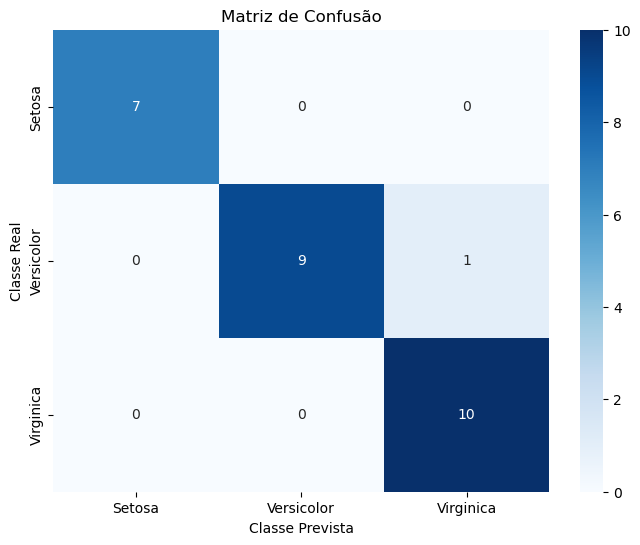

Fold 1:
Score de Treinamento: 0.9907407407407407
Score de Teste: 0.9259259259259259

Fold 2:
Score de Treinamento: 0.9722222222222222
Score de Teste: 1.0

Fold 3:
Score de Treinamento: 0.9814814814814815
Score de Teste: 1.0

Fold 4:
Score de Treinamento: 1.0
Score de Teste: 0.9259259259259259

Fold 5:
Score de Treinamento: 0.9814814814814815
Score de Teste: 0.9629629629629629



In [131]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'lbfgs'
activation = 'relu'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


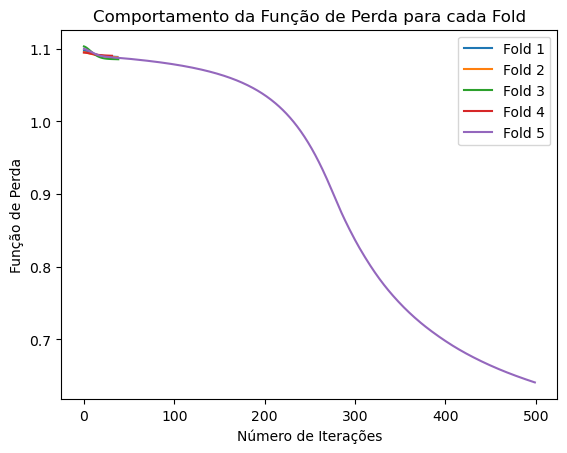

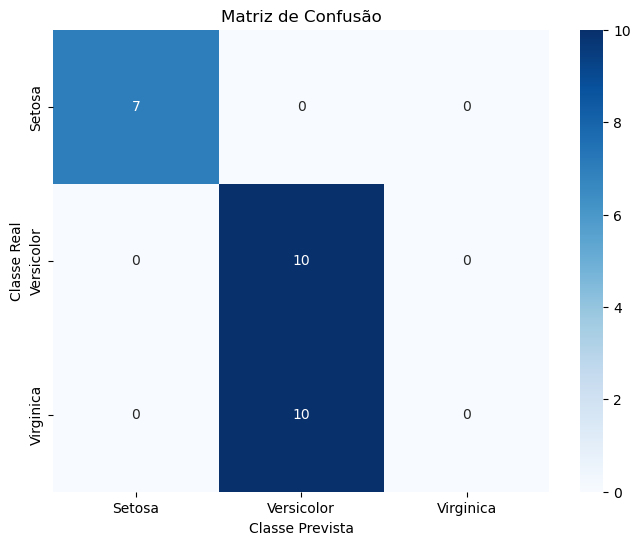

Fold 1:
Score de Treinamento: 0.3425925925925926
Score de Teste: 0.3333333333333333

Fold 2:
Score de Treinamento: 0.39814814814814814
Score de Teste: 0.2962962962962963

Fold 3:
Score de Treinamento: 0.37037037037037035
Score de Teste: 0.18518518518518517

Fold 4:
Score de Treinamento: 0.5185185185185185
Score de Teste: 0.4074074074074074

Fold 5:
Score de Treinamento: 0.6574074074074074
Score de Teste: 0.6296296296296297



In [154]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'sgd'
activation = 'relu'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

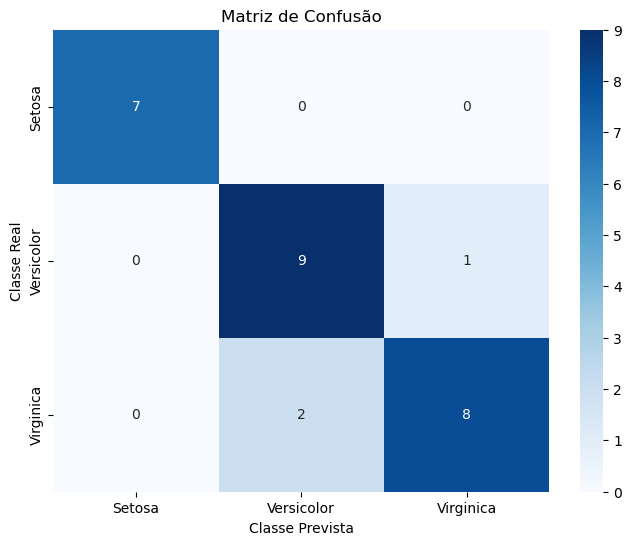

Fold 1:
Score de Treinamento: 0.9814814814814815
Score de Teste: 0.9259259259259259

Fold 2:
Score de Treinamento: 0.9814814814814815
Score de Teste: 1.0

Fold 3:
Score de Treinamento: 0.9814814814814815
Score de Teste: 1.0

Fold 4:
Score de Treinamento: 1.0
Score de Teste: 0.9259259259259259

Fold 5:
Score de Treinamento: 1.0
Score de Teste: 0.8888888888888888



In [153]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'lbfgs'
activation = 'identity'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

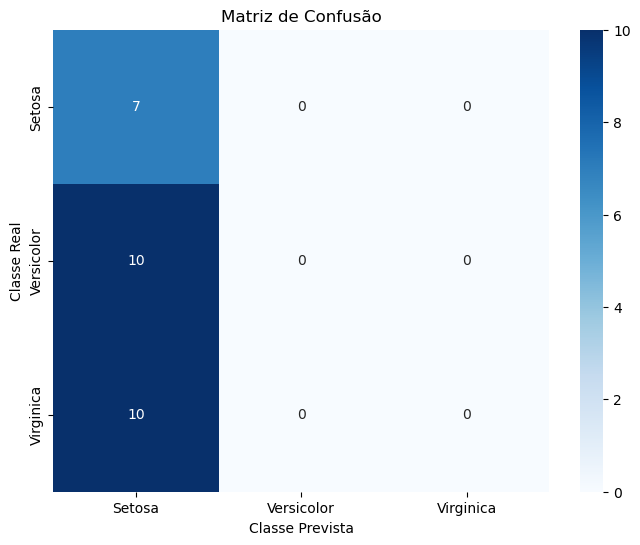

Fold 1:
Score de Treinamento: 0.3333333333333333
Score de Teste: 0.3333333333333333

Fold 2:
Score de Treinamento: 0.35185185185185186
Score de Teste: 0.25925925925925924

Fold 3:
Score de Treinamento: 0.37037037037037035
Score de Teste: 0.18518518518518517

Fold 4:
Score de Treinamento: 0.35185185185185186
Score de Teste: 0.25925925925925924

Fold 5:
Score de Treinamento: 0.35185185185185186
Score de Teste: 0.25925925925925924



In [152]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'lbfgs'
activation = 'tanh'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

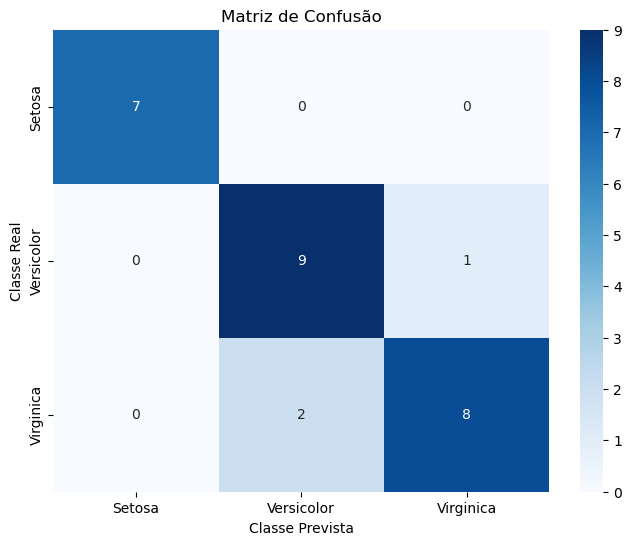

Fold 1:
Score de Treinamento: 0.9814814814814815
Score de Teste: 0.9259259259259259

Fold 2:
Score de Treinamento: 0.6944444444444444
Score de Teste: 0.5555555555555556

Fold 3:
Score de Treinamento: 0.9814814814814815
Score de Teste: 1.0

Fold 4:
Score de Treinamento: 0.6666666666666666
Score de Teste: 0.6666666666666666

Fold 5:
Score de Treinamento: 1.0
Score de Teste: 0.8888888888888888



In [151]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'lbfgs'
activation = 'logistic'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib

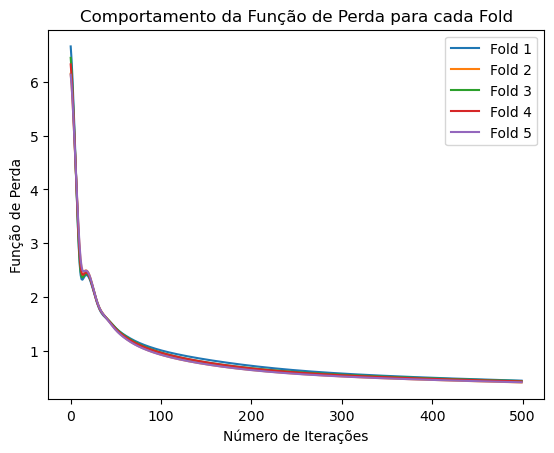

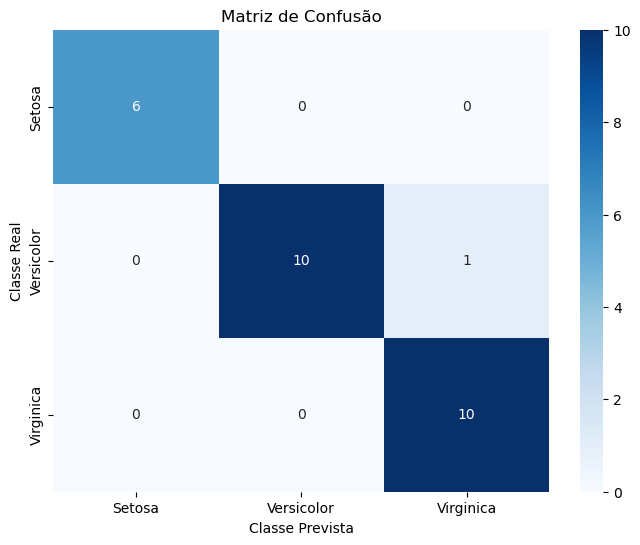

Fold 1:
Score de Treinamento: 0.7962962962962963
Score de Teste: 0.8148148148148148

Fold 2:
Score de Treinamento: 0.9166666666666666
Score de Teste: 0.8888888888888888

Fold 3:
Score de Treinamento: 0.9259259259259259
Score de Teste: 0.8518518518518519

Fold 4:
Score de Treinamento: 0.8333333333333334
Score de Teste: 0.7037037037037037

Fold 5:
Score de Treinamento: 0.8611111111111112
Score de Teste: 0.9629629629629629



In [160]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'sgd'
activation = 'identity'

kf = KFold(n_splits=k, shuffle=True, random_state=500)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

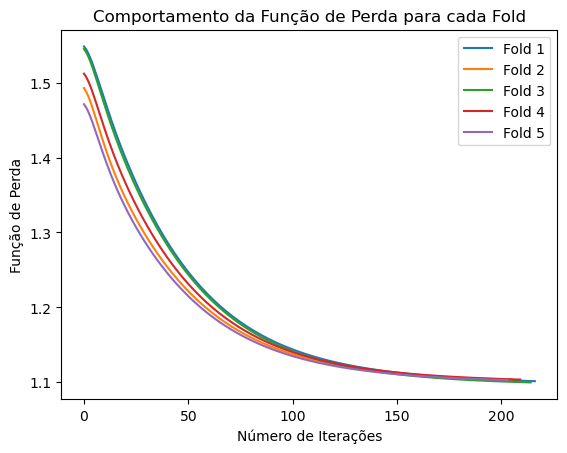

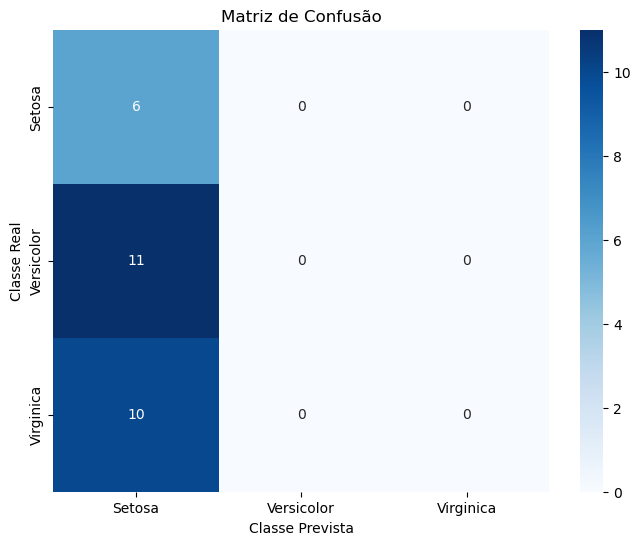

Fold 1:
Score de Treinamento: 0.37037037037037035
Score de Teste: 0.18518518518518517

Fold 2:
Score de Treinamento: 0.35185185185185186
Score de Teste: 0.25925925925925924

Fold 3:
Score de Treinamento: 0.37962962962962965
Score de Teste: 0.14814814814814814

Fold 4:
Score de Treinamento: 0.3333333333333333
Score de Teste: 0.3333333333333333

Fold 5:
Score de Treinamento: 0.3611111111111111
Score de Teste: 0.2222222222222222



In [161]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'sgd'
activation = 'tanh'

kf = KFold(n_splits=k, shuffle=True, random_state=500)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

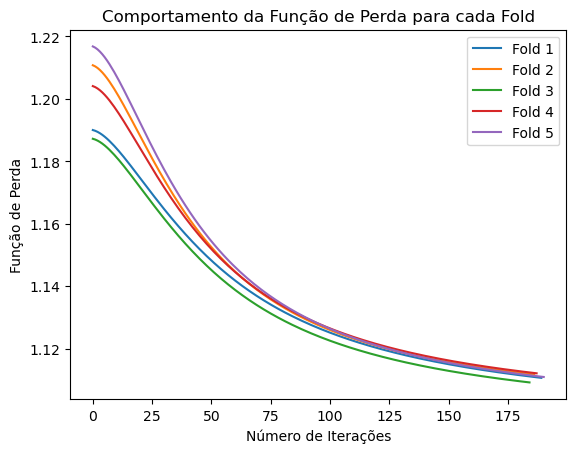

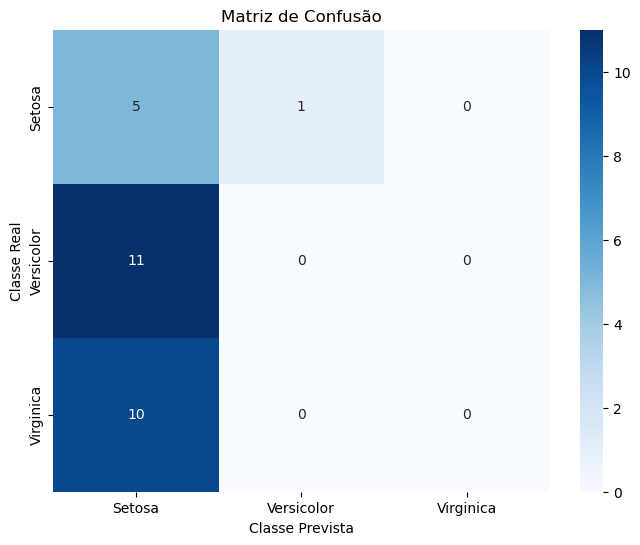

Fold 1:
Score de Treinamento: 0.37037037037037035
Score de Teste: 0.18518518518518517

Fold 2:
Score de Treinamento: 0.046296296296296294
Score de Teste: 0.037037037037037035

Fold 3:
Score de Treinamento: 0.37962962962962965
Score de Teste: 0.14814814814814814

Fold 4:
Score de Treinamento: 0.35185185185185186
Score de Teste: 0.25925925925925924

Fold 5:
Score de Treinamento: 0.25
Score de Teste: 0.18518518518518517



In [162]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'sgd'
activation = 'logistic'

kf = KFold(n_splits=k, shuffle=True, random_state=500)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib

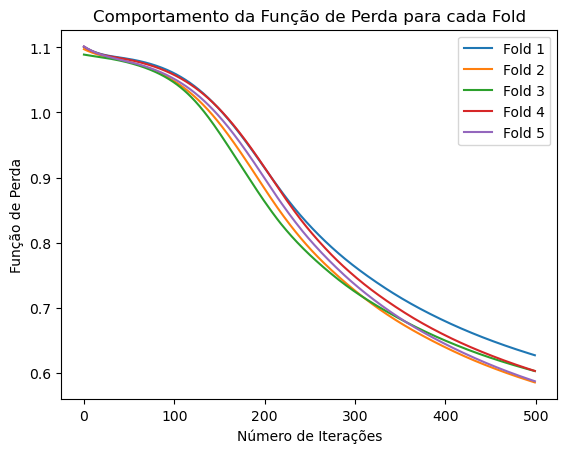

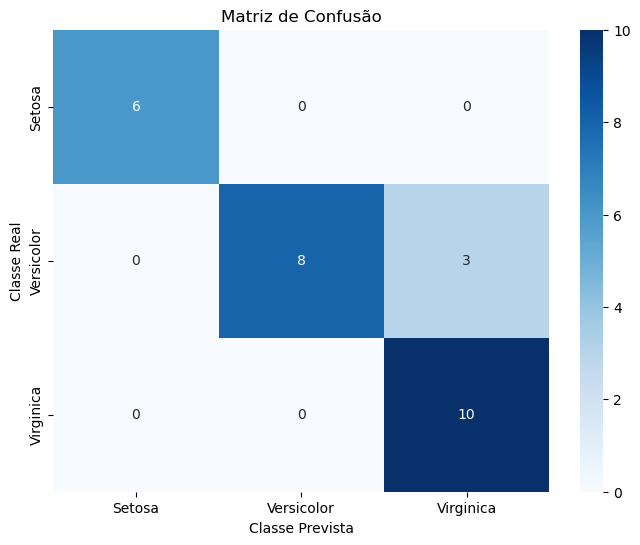

Fold 1:
Score de Treinamento: 0.7037037037037037
Score de Teste: 0.6296296296296297

Fold 2:
Score de Treinamento: 0.9444444444444444
Score de Teste: 0.8888888888888888

Fold 3:
Score de Treinamento: 0.6944444444444444
Score de Teste: 0.5555555555555556

Fold 4:
Score de Treinamento: 0.75
Score de Teste: 0.6296296296296297

Fold 5:
Score de Treinamento: 0.8518518518518519
Score de Teste: 0.8888888888888888



In [163]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'adam'
activation = 'relu'

kf = KFold(n_splits=k, shuffle=True, random_state=500)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

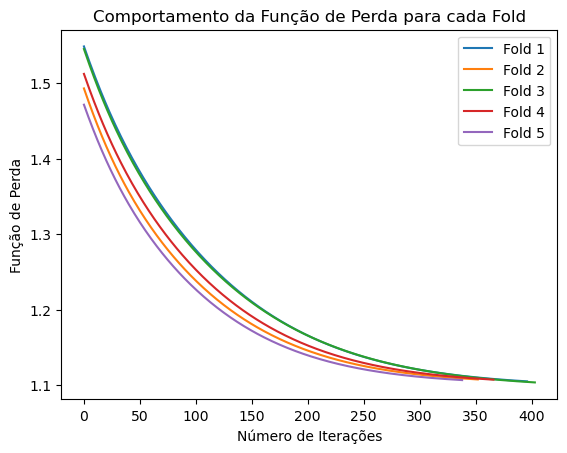

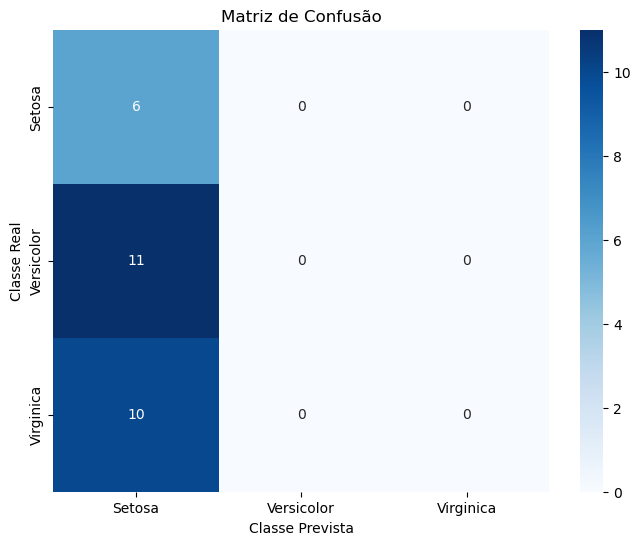

Fold 1:
Score de Treinamento: 0.26851851851851855
Score de Teste: 0.37037037037037035

Fold 2:
Score de Treinamento: 0.35185185185185186
Score de Teste: 0.25925925925925924

Fold 3:
Score de Treinamento: 0.3055555555555556
Score de Teste: 0.37037037037037035

Fold 4:
Score de Treinamento: 0.3333333333333333
Score de Teste: 0.3333333333333333

Fold 5:
Score de Treinamento: 0.3611111111111111
Score de Teste: 0.2222222222222222



In [164]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'adam'
activation = 'tanh'

kf = KFold(n_splits=k, shuffle=True, random_state=500)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib

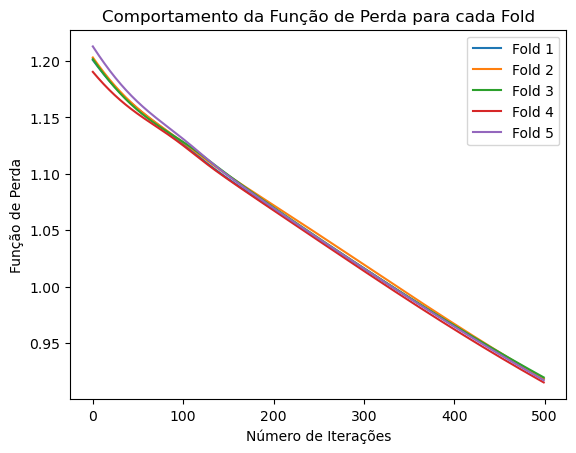

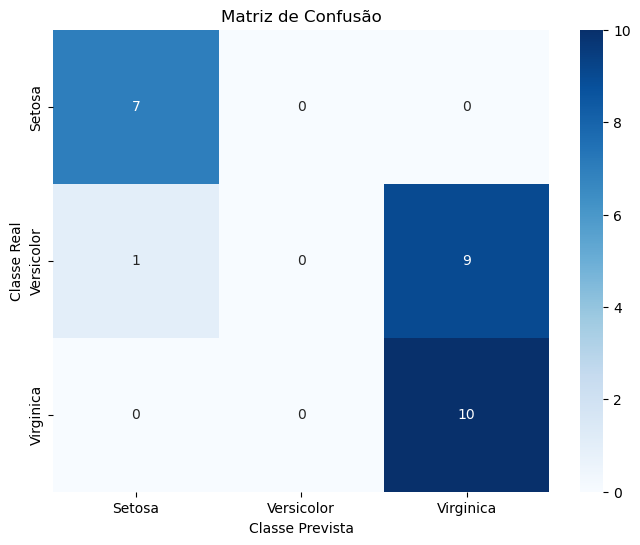

Fold 1:
Score de Treinamento: 0.6666666666666666
Score de Teste: 0.6666666666666666

Fold 2:
Score de Treinamento: 0.6851851851851852
Score de Teste: 0.5555555555555556

Fold 3:
Score de Treinamento: 0.6944444444444444
Score de Teste: 0.5555555555555556

Fold 4:
Score de Treinamento: 0.7870370370370371
Score de Teste: 0.7407407407407407

Fold 5:
Score de Treinamento: 0.6759259259259259
Score de Teste: 0.6296296296296297



In [166]:
k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'adam'
activation = 'logistic'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

tarefa3(max_iterations, hidden_layer_sizes, solver, activation)

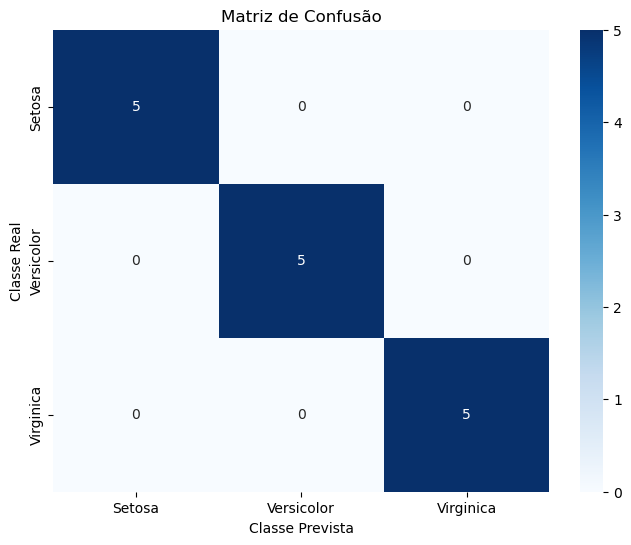

In [222]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target, random_state=42)

model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      max_iter=max_iterations,
                      activation=activation,
                      solver=solver,
                      random_state=42)

model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)

# faz uma matriz de confusão 
cm = confusion_matrix(y_test, model.predict(X_test))

# Visualizando a matriz de confusão
labels = ['Setosa', 'Versicolor', 'Virginica']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()



In [221]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target, random_state=42)

max_iterations = 500
hidden_layer_sizes = 2
solver = 'lbfgs'
activation = 'identity'
n_repeats = 100

scores = []
for _ in range(n_repeats):
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                          max_iter=max_iterations,
                          activation=activation,
                          solver=solver)

    # Treinando o modelo com 90% dos dados de treinamento
    model.fit(X_train, y_train)

    # Avaliando o modelo com as 15 instâncias não utilizadas
    test_score = model.score(X_test, y_test)
    scores.append(test_score)

# Calculando a média dos scores
mean_score = np.mean(scores)

print(f"Média do Score: {mean_score}")

/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Média do Score: 1.0
